In [177]:
from deepface import DeepFace

In [7]:
dfs = DeepFace.find(
  img_path = "pic2.jpg",
  db_path = "../../criminal_data",
)

24-06-21 15:20:58 - Searching pic2.jpg in 7 length datastore
24-06-21 15:20:58 - find function duration 0.491591215133667 seconds


In [8]:
dfs

[Empty DataFrame
 Columns: [identity, hash, target_x, target_y, target_w, target_h, source_x, source_y, source_w, source_h, threshold, distance]
 Index: []]

In [9]:
embedding_objs = DeepFace.represent(
  img_path = "pic2.jpg"
)

In [11]:
models = [
  "VGG-Face", 
  "Facenet", 
  "Facenet512", 
  "OpenFace", 
  "DeepFace", 
  "DeepID", 
  "ArcFace", 
  "Dlib", 
  "SFace",
  "GhostFaceNet",
]

#face verification
result = DeepFace.verify(
  img1_path = "pic1.jpeg",
  img2_path = "input.jpeg",
  model_name = models[0],
)

#face recognition
dfs = DeepFace.find(
  img_path = "pic1.jpeg",
  db_path = "../../criminal_data", 
  model_name = models[1],
)

#embeddings
embedding_objs = DeepFace.represent(
  img_path = "pic1.jpeg",
  model_name = models[2],
)

24-06-21 15:24:07 - Found 6 newly added image(s), 0 removed image(s), 0 replaced image(s).


Finding representations:   0%|          | 0/6 [00:00<?, ?it/s]

24-06-21 15:24:11 - facenet_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet_weights.h5
To: C:\Users\pablo\.deepface\weights\facenet_weights.h5
100%|██████████| 92.2M/92.2M [00:01<00:00, 47.1MB/s]
Finding representations:  50%|█████     | 3/6 [00:12<00:10,  3.39s/it]

24-06-21 15:24:19 - 🔴 Exception while extracting faces from ../../criminal_data\Mbappé\pic2.jpg: Input image must not have non-english characters - ../../criminal_data\Mbappé\pic2.jpg


Finding representations: 100%|██████████| 6/6 [00:13<00:00,  2.27s/it]


24-06-21 15:24:21 - 🔴 Exception while extracting faces from ../../criminal_data\Mbappé\pic1.jpeg: Input image must not have non-english characters - ../../criminal_data\Mbappé\pic1.jpeg
24-06-21 15:24:21 - There are now 7 representations in ds_model_facenet_detector_opencv_aligned_normalization_base_expand_0.pkl
24-06-21 15:24:21 - Searching pic1.jpeg in 7 length datastore
24-06-21 15:24:22 - find function duration 14.958686113357544 seconds
24-06-21 15:24:25 - facenet512_weights.h5 will be downloaded...


Downloading...
From: https://github.com/serengil/deepface_models/releases/download/v1.0/facenet512_weights.h5
To: C:\Users\pablo\.deepface\weights\facenet512_weights.h5
100%|██████████| 95.0M/95.0M [00:02<00:00, 43.3MB/s]


In [13]:
result

{'verified': True,
 'distance': 0.6425123238256034,
 'threshold': 0.68,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 622,
   'y': 302,
   'w': 485,
   'h': 485,
   'left_eye': (946, 497),
   'right_eye': (782, 499)},
  'img2': {'x': 646,
   'y': 299,
   'w': 564,
   'h': 564,
   'left_eye': None,
   'right_eye': None}},
 'time': 5.73}

seleccionamos modelos más precisos

Cada uno tiene su propio `threshold`, si la distancia entre las imágenes es menor, se dirá que son iguales (`verified=True`)

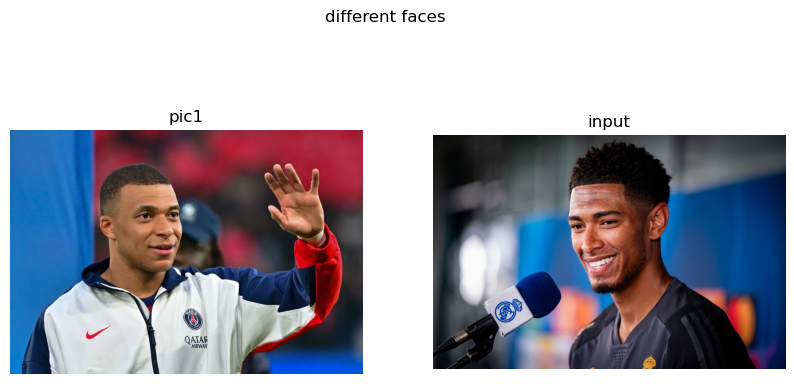

In [22]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

fig, axs = plt.subplots(1, 2, figsize=(10, 5))
plt.suptitle("different faces")
# Load images
img1 = mpimg.imread('pic1.jpeg')
img2 = mpimg.imread('input.jpeg')

# Display images
axs[0].imshow(img1)
axs[0].set_title('pic1')
axs[0].axis('off')  # Turn off axis

axs[1].imshow(img2)
axs[1].set_title('input')
axs[1].axis('off')  # Turn off axis

plt.show()



In [255]:
x = img2

In [256]:
face_objs = DeepFace.extract_faces( #extracting faces from the input image
        img_path = x, 
        detector_backend = "yolov8",
        
    )
    
print("this",face_objs)
#returns a list of dictionaries, each one with face pixels, confidence, width. height...etc 

detected_faces = [face_objs[idx]["face"] for idx in range(0, len(face_objs)) \
        if face_objs[idx]["confidence"] > 0.7
        ]

this [{'face': array([[[    0.41569,     0.41569,     0.35294],
        [    0.41961,     0.41961,     0.35686],
        [    0.41961,     0.41961,     0.35686],
        ...,
        [   0.011765,   0.0078431,    0.015686],
        [   0.035294,    0.031373,    0.039216],
        [   0.062745,    0.058824,    0.066667]],

       [[    0.41569,     0.41569,     0.35294],
        [    0.41569,     0.41569,     0.35294],
        [    0.41961,     0.41961,     0.35686],
        ...,
        [   0.035294,    0.031373,    0.039216],
        [    0.05098,    0.047059,    0.054902],
        [    0.05098,    0.047059,    0.054902]],

       [[    0.41569,     0.41569,     0.35294],
        [    0.41569,     0.41569,     0.35294],
        [    0.41961,     0.41961,     0.35686],
        ...,
        [   0.031373,    0.027451,    0.035294],
        [   0.023529,    0.019608,    0.027451],
        [   0.019608,    0.015686,    0.023529]],

       ...,

       [[    0.54902,     0.42353,     0.7019

In [257]:
a = DeepFace.find(
        img_path = detected_faces[0],
        db_path = "../../criminal_data", 
        enforce_detection=False, #si no hay cara, no se verifica,
        distance_metric="euclidean_l2"
        
        )

24-06-21 22:30:20 - Searching [[[    0.41569     0.41569     0.35294]
  [    0.41961     0.41961     0.35686]
  [    0.41961     0.41961     0.35686]
  ...
  [   0.011765   0.0078431    0.015686]
  [   0.035294    0.031373    0.039216]
  [   0.062745    0.058824    0.066667]]

 [[    0.41569     0.41569     0.35294]
  [    0.41569     0.41569     0.35294]
  [    0.41961     0.41961     0.35686]
  ...
  [   0.035294    0.031373    0.039216]
  [    0.05098    0.047059    0.054902]
  [    0.05098    0.047059    0.054902]]

 [[    0.41569     0.41569     0.35294]
  [    0.41569     0.41569     0.35294]
  [    0.41961     0.41961     0.35686]
  ...
  [   0.031373    0.027451    0.035294]
  [   0.023529    0.019608    0.027451]
  [   0.019608    0.015686    0.023529]]

 ...

 [[    0.54902     0.42353     0.70196]
  [     0.5451     0.42353     0.69412]
  [     0.5451     0.42353     0.69412]
  ...
  [    0.22745     0.32157     0.58039]
  [    0.22745     0.32157     0.58039]
  [    0.23137

In [258]:
a[0]

,identity,hash,target_x,target_y,target_w,target_h,source_x,source_y,source_w,source_h,threshold,distance
0,../../criminal_data\Bellingham\pic2.jpg,9aec69a7e0a30b1d8d8d48649b0e77f9f2f1fdd1,610,257,280,280,0,0,456,626,1.17,1.147710
1,../../criminal_data\Mbappe\pic2.jpg,8cc3e82895eef05da7832123d2a4503445e5393c,316,43,133,133,0,0,456,626,1.17,1.150861


In [263]:
recognition_results = [
        DeepFace.find(
        img_path = detected_faces[idx],
        db_path = "../../criminal_data", 
        enforce_detection=False, #si no hay cara, no se verifica,
        distance_metric="euclidean_l2"
        
        ) if len(detected_faces) > 0 else []
        #obtenemos el primer elemento de la lista que devuelve find()
        #ya que lo hace para cada cara, y nosotros solo entregamos de 1 en 1
        
        for idx in range(0, len(detected_faces))
    ]

#lista de listas con dataframes

24-06-21 22:31:11 - Searching [[[    0.41569     0.41569     0.35294]
  [    0.41961     0.41961     0.35686]
  [    0.41961     0.41961     0.35686]
  ...
  [   0.011765   0.0078431    0.015686]
  [   0.035294    0.031373    0.039216]
  [   0.062745    0.058824    0.066667]]

 [[    0.41569     0.41569     0.35294]
  [    0.41569     0.41569     0.35294]
  [    0.41961     0.41961     0.35686]
  ...
  [   0.035294    0.031373    0.039216]
  [    0.05098    0.047059    0.054902]
  [    0.05098    0.047059    0.054902]]

 [[    0.41569     0.41569     0.35294]
  [    0.41569     0.41569     0.35294]
  [    0.41961     0.41961     0.35686]
  ...
  [   0.031373    0.027451    0.035294]
  [   0.023529    0.019608    0.027451]
  [   0.019608    0.015686    0.023529]]

 ...

 [[    0.54902     0.42353     0.70196]
  [     0.5451     0.42353     0.69412]
  [     0.5451     0.42353     0.69412]
  ...
  [    0.22745     0.32157     0.58039]
  [    0.22745     0.32157     0.58039]
  [    0.23137

In [260]:
import pandas as pd

In [261]:
pd.Series()

Series([], dtype: object)

In [264]:
empty_table = pd.DataFrame(columns=["identity",  "hash", \
                            "target_x", "target_y", "target_w", "target_h",\
                                "source_x", "source_y", "source_w", "source_h", \
                                    "threshold", "distance"])

# print(recognition_results)

recognition_results = [pd.DataFrame(recognition_results[0][0].min()).T if len(result)>=0 else empty_table
                        
                        for result in recognition_results 
                        ]

In [265]:
recognition_results

[                                  identity  \
 0  ../../criminal_data\Bellingham\pic2.jpg   
 
                                        hash target_x target_y target_w  \
 0  8cc3e82895eef05da7832123d2a4503445e5393c      316       43      133   
 
   target_h source_x source_y source_w source_h threshold distance  
 0      133        0        0      456      626      1.17  1.14771  ]

In [266]:
recognition_results[0]

,identity,hash,target_x,target_y,target_w,target_h,source_x,source_y,source_w,source_h,threshold,distance
0,../../criminal_data\Bellingham\pic2.jpg,8cc3e82895eef05da7832123d2a4503445e5393c,316,43,133,133,0,0,456,626,1.17,1.14771


In [267]:
recognized_criminals = [result.identity[0].split("\\")[-2] 
                                for result in recognition_results
                                # if result.distance[0] < result.threshold[0]
                                ]

In [268]:
recognized_criminals

['Bellingham']

Best model for face recognition model=`Facenet512`

In [24]:
#face verification
result = DeepFace.verify(
  img1_path = "pic1.jpeg",
  img2_path = "input.jpeg",
  model_name = models[2],
)
result

{'verified': False,
 'distance': 0.452497509337043,
 'threshold': 0.3,
 'model': 'Facenet512',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine',
 'facial_areas': {'img1': {'x': 622,
   'y': 302,
   'w': 485,
   'h': 485,
   'left_eye': (946, 497),
   'right_eye': (782, 499)},
  'img2': {'x': 646,
   'y': 299,
   'w': 564,
   'h': 564,
   'left_eye': None,
   'right_eye': None}},
 'time': 4.44}

Spotted error it throws whenever the image has no faces or the model believes so

In [26]:
# #face verification
# result = DeepFace.verify(
#   img1_path = "pic1.jpeg",
#   img2_path = "mbappe-8.jpeg",
#   model_name = models[2],
# )
# result

Face detectors 

* +accuracy -> `backend=retinaface` o `backend=mtcnn`

* +speed -> `backend=opencv` o `backend=ssd`

In [38]:
backends = [
  'opencv', 
  'ssd', 
  'dlib', 
  'mtcnn', 
  'fastmtcnn',
  'retinaface', 
  'mediapipe',
  'yolov8',
  'yunet',
  'centerface',
]

#face detection and alignment
face_objs = DeepFace.extract_faces(
  img_path = "triple.jpg", 
  detector_backend = backends[4],
)

Se detectaron 3 caras. El objeto devuelve una lista con un diccionario para cada cara, con su recorte, width, height...etc

In [110]:
face_objs[0]

{'face': array([[[    0.84706,     0.76863,    0.019608],
         [    0.83922,     0.75686,    0.054902],
         [    0.82745,     0.76078,     0.11373],
         ...,
         [    0.21569,         0.2,     0.19608],
         [    0.21176,     0.19608,     0.19216],
         [    0.24314,     0.22745,     0.22353]],
 
        [[    0.85098,     0.75686,    0.019608],
         [    0.83137,     0.75686,    0.058824],
         [    0.83922,     0.76863,     0.14902],
         ...,
         [    0.21569,         0.2,     0.19608],
         [    0.22353,     0.20784,     0.20392],
         [    0.21961,     0.20392,         0.2]],
 
        [[    0.85882,     0.76471,    0.027451],
         [    0.83922,     0.76078,    0.082353],
         [    0.82745,     0.75294,     0.14902],
         ...,
         [    0.22353,     0.20784,     0.20392],
         [    0.21176,     0.19608,     0.19216],
         [    0.14902,     0.13333,     0.12941]],
 
        ...,
 
        [[    0.95686,    

In [114]:
# detected_faces = [face_objs[idx]["face"] for idx in range(0, len(face_objs))]


In [39]:
len(face_objs)

3

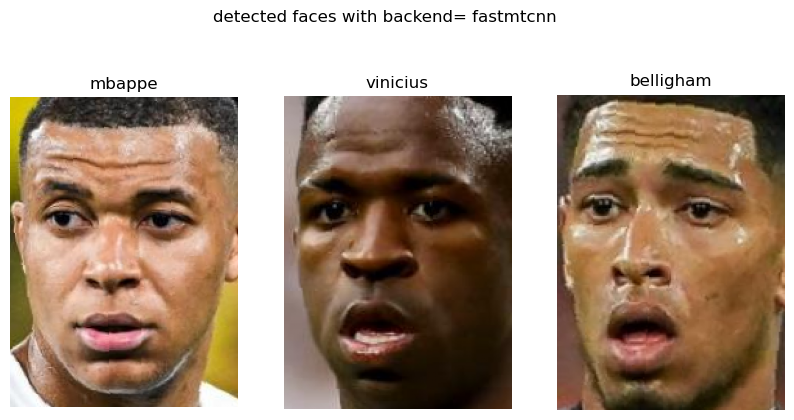

In [45]:
fig, axs = plt.subplots(1, 3, figsize=(10, 5))
plt.suptitle(f"detected faces with backend= {backends[4]}")
# Load images
face1 = face_objs[0]["face"]
face2 = face_objs[1]["face"]
face3 = face_objs[2]["face"]

# Display images
axs[0].imshow(face1)
axs[0].set_title('mbappe')
axs[0].axis('off')  # Turn off axis

axs[1].imshow(face2)
axs[1].set_title('vinicius')
axs[1].axis('off')  # Turn off axis

axs[2].imshow(face3)
axs[2].set_title('belligham')
axs[2].axis('off')  # Turn off axis

plt.show()

In [35]:
face_objs[0]["face"]

array([[[0.82745098, 0.75294118, 0.01568627],
        [0.82745098, 0.75294118, 0.01568627],
        [0.82352941, 0.74901961, 0.01176471],
        ...,
        [0.04705882, 0.04705882, 0.05490196],
        [0.04705882, 0.04705882, 0.05490196],
        [0.04313725, 0.04313725, 0.05098039]],

       [[0.82352941, 0.75686275, 0.00784314],
        [0.83137255, 0.75686275, 0.01960784],
        [0.83137255, 0.75686275, 0.01960784],
        ...,
        [0.02745098, 0.02745098, 0.03529412],
        [0.01176471, 0.01176471, 0.01960784],
        [0.01960784, 0.01960784, 0.02745098]],

       [[0.82352941, 0.75686275, 0.00784314],
        [0.83137255, 0.75686275, 0.01960784],
        [0.83529412, 0.74901961, 0.02745098],
        ...,
        [0.08627451, 0.08627451, 0.09411765],
        [0.00784314, 0.00784314, 0.01568627],
        [0.0745098 , 0.0745098 , 0.08235294]],

       ...,

       [[0.88235294, 0.89803922, 0.90980392],
        [0.88235294, 0.89803922, 0.90980392],
        [0.89411765, 0

In [78]:
#face detection and alignment
face_objs = DeepFace.extract_faces(
  img_path = "triple.jpg", 
  detector_backend = "yolov8",
)

24-06-21 18:39:35 - Downloading Yolo weights from https://drive.google.com/uc?id=1qcr9DbgsX3ryrz2uU8w4Xm3cOrRywXqb to C:\Users\pablo/.deepface/weights/yolov8n-face.pt...


Downloading...
From: https://drive.google.com/uc?id=1qcr9DbgsX3ryrz2uU8w4Xm3cOrRywXqb
To: C:\Users\pablo\.deepface\weights\yolov8n-face.pt
100%|██████████| 6.39M/6.39M [00:00<00:00, 16.4MB/s]


24-06-21 18:39:38 - Yolo model is just downloaded to yolov8n-face.pt


In [79]:
len(face_objs)

3

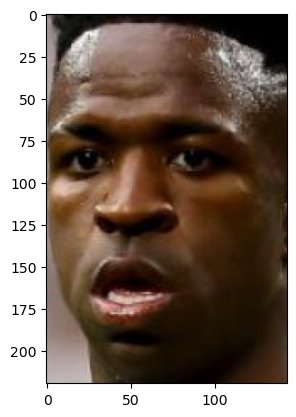

In [82]:
plt.imshow(face_objs[2]["face"])

In [83]:
# #face detection and alignment
# face_objs = DeepFace.extract_faces(
#   img_path = "triple.jpg", 
#   detector_backend = "opencv",
# )

In [84]:
# len(face_objs)

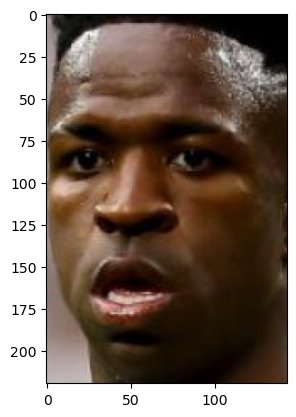

In [107]:
plt.imshow(face_objs[2]["face"])

Imaginemos que esta imagen ha sido una de las detectadas por el detector

Ahora, usemos `verify()` para saber si está en la base de datos

In [104]:
#face recognition
dfs = DeepFace.find(
  img_path = face_objs[2]["face"],
  db_path = "../../criminal_data", 
  # model_name = "Facenet",
  # detector_backend=backends[1],
  enforce_detection=False #si no hay cara, no se verifica
)

24-06-21 18:47:26 - Searching [[[    0.63137     0.58431     0.59216]
  [    0.52157     0.47451     0.48235]
  [    0.47451     0.43529     0.43922]
  ...
  [  0.0039216   0.0039216   0.0039216]
  [  0.0039216   0.0039216   0.0039216]
  [  0.0039216   0.0039216   0.0039216]]

 [[    0.62745     0.58039     0.58824]
  [    0.52549     0.47843     0.48627]
  [    0.49412      0.4549     0.45882]
  ...
  [  0.0039216   0.0039216   0.0039216]
  [  0.0039216   0.0039216   0.0039216]
  [  0.0039216   0.0039216   0.0039216]]

 [[    0.63529     0.58824     0.59608]
  [    0.57647     0.52941     0.53725]
  [    0.52157     0.48235     0.48627]
  ...
  [          0           0           0]
  [          0           0           0]
  [          0           0           0]]

 ...

 [[    0.74902     0.70588     0.72157]
  [     0.7451     0.70196     0.71765]
  [     0.7451     0.70588      0.7098]
  ...
  [    0.31765     0.20784     0.12549]
  [    0.32549     0.21176     0.14118]
  [    0.32941

La métrica de distancia `"euclidean_l2"` es más estable según los docs

In [116]:
dfs[0]

,identity,hash,target_x,target_y,target_w,target_h,source_x,source_y,source_w,source_h,threshold,distance
0,../../criminal_data\Vinicius\pic1.jpg,25887ba5c053165976c0752733b7377f64c05b86,741,267,507,507,0,0,143,220,0.68,0.645781


Correctamente, detectó la cara como Vinicius, ya que le dió la mayor similitud a esta imagen de su directorio

In [117]:
# #face recognition
# dfs = DeepFace.find(
#   img_path = face_objs[2]["face"],
#   db_path = "../../criminal_data", 
#   # model_name = "Facenet",
#   # detector_backend=backends[1],
#   enforce_detection=False #si no hay cara, no se verifica,
#   distance_metric="euclidean_l2"
# )

In [252]:
dfs = DeepFace.find(
  img_path = "triple.jpg",
  db_path = "../../criminal_data", 
  # model_name = "Facenet",
  detector_backend="yolov8",
  enforce_detection=False #si no hay cara, no se verifica
)

24-06-21 22:27:40 - Searching triple.jpg in 6 length datastore
24-06-21 22:27:49 - find function duration 8.382059574127197 seconds


In [51]:
# face_objs = DeepFace.extract_faces(
#   img_path = "triple.jpg", 
#   detector_backend = "ssd",
# )

#SSD HAS BAD ACCURACY

In [50]:
len(face_objs)

1

In [118]:
dfs = DeepFace.find(
            img_path = face_objs[2]["face"],
            db_path = "../../criminal_data", 
            enforce_detection=False, #si no hay cara, no se verifica,
            distance_metric="euclidean_l2"
            )

24-06-21 19:02:11 - Searching [[[    0.63137     0.58431     0.59216]
  [    0.52157     0.47451     0.48235]
  [    0.47451     0.43529     0.43922]
  ...
  [  0.0039216   0.0039216   0.0039216]
  [  0.0039216   0.0039216   0.0039216]
  [  0.0039216   0.0039216   0.0039216]]

 [[    0.62745     0.58039     0.58824]
  [    0.52549     0.47843     0.48627]
  [    0.49412      0.4549     0.45882]
  ...
  [  0.0039216   0.0039216   0.0039216]
  [  0.0039216   0.0039216   0.0039216]
  [  0.0039216   0.0039216   0.0039216]]

 [[    0.63529     0.58824     0.59608]
  [    0.57647     0.52941     0.53725]
  [    0.52157     0.48235     0.48627]
  ...
  [          0           0           0]
  [          0           0           0]
  [          0           0           0]]

 ...

 [[    0.74902     0.70588     0.72157]
  [     0.7451     0.70196     0.71765]
  [     0.7451     0.70588      0.7098]
  ...
  [    0.31765     0.20784     0.12549]
  [    0.32549     0.21176     0.14118]
  [    0.32941

In [120]:
dfs[0]

,identity,hash,target_x,target_y,target_w,target_h,source_x,source_y,source_w,source_h,threshold,distance
0,../../criminal_data\Vinicius\pic1.jpg,25887ba5c053165976c0752733b7377f64c05b86,741,267,507,507,0,0,143,220,1.17,1.136469


In [121]:
dfs = DeepFace.find(
            img_path = "mbappe-8.jpg",
            db_path = "../../criminal_data", 
            enforce_detection=False, #won't set a face if there is no face
            distance_metric="euclidean_l2"
            )

24-06-21 19:05:36 - Searching mbappe-8.jpg in 7 length datastore
24-06-21 19:05:45 - find function duration 9.677760362625122 seconds


In [123]:
dfs[0]

,identity,hash,target_x,target_y,target_w,target_h,source_x,source_y,source_w,source_h,threshold,distance
0,../../criminal_data\Bellingham\pic1.png,29037cd32d2d886490d0651ace52c3508d26cd86,1319,1332,72,72,0,0,1800,1013,1.17,1.082082


In [142]:
# dfs = DeepFace.find(
#             img_path = "mbappe-8.jpg",
#             db_path = "../../criminal_data", 
#             enforce_detection=False, #won't set a face if there is no face
#             distance_metric="euclidean_l2",
#             model_name="Facenet512"
#             )


Parece que dándole al modelo la imagen y luego detectando no consigue hacerlo correctamente, pero si primero detectamos la cara después usamos `find()`, funciona

In [125]:
dfs

[Empty DataFrame
 Columns: [identity, hash, target_x, target_y, target_w, target_h, source_x, source_y, source_w, source_h, threshold, distance]
 Index: []]

In [126]:
face_objs = DeepFace.extract_faces(
  img_path = "mbappe-8.jpg", 
  detector_backend = "yolov8",
)

In [128]:
face_objs[0]

{'face': array([[[    0.11765,     0.11765,     0.11765],
         [    0.12549,     0.11373,     0.11765],
         [    0.12549,     0.11373,     0.11765],
         ...,
         [    0.15294,     0.13725,     0.13333],
         [    0.15686,     0.12941,     0.12941],
         [    0.16471,     0.13725,     0.13725]],
 
        [[    0.11765,     0.11765,     0.11765],
         [    0.12549,     0.11373,     0.11765],
         [    0.13725,     0.11765,     0.12157],
         ...,
         [    0.15686,     0.14118,     0.13725],
         [    0.17255,     0.14902,     0.14902],
         [    0.18824,     0.16078,     0.16078]],
 
        [[    0.12157,     0.12157,     0.12157],
         [    0.12941,     0.12157,     0.12157],
         [    0.13725,     0.11765,     0.12157],
         ...,
         [    0.19216,     0.17255,     0.16863],
         [    0.19216,     0.16471,     0.16471],
         [    0.19216,     0.16471,     0.16471]],
 
        ...,
 
        [[    0.71373,    

In [133]:
detected_faces = [face_objs[idx]["face"] for idx in range(0, len(face_objs)) \
    
    if face_objs[idx]["confidence"] > 0.7
    
    #automáticamente si no hay caras, no se guardarán aquí
    ]


In [135]:
len(detected_faces)

1

In [143]:
dfs = DeepFace.find(
            img_path = detected_faces[0]
            ,
            db_path = "../../criminal_data", 
            enforce_detection=False, #won't set a face if there is no face
            distance_metric="euclidean_l2"
            )

24-06-21 20:11:01 - Searching [[[    0.11765     0.11765     0.11765]
  [    0.12549     0.11373     0.11765]
  [    0.12549     0.11373     0.11765]
  ...
  [    0.15294     0.13725     0.13333]
  [    0.15686     0.12941     0.12941]
  [    0.16471     0.13725     0.13725]]

 [[    0.11765     0.11765     0.11765]
  [    0.12549     0.11373     0.11765]
  [    0.13725     0.11765     0.12157]
  ...
  [    0.15686     0.14118     0.13725]
  [    0.17255     0.14902     0.14902]
  [    0.18824     0.16078     0.16078]]

 [[    0.12157     0.12157     0.12157]
  [    0.12941     0.12157     0.12157]
  [    0.13725     0.11765     0.12157]
  ...
  [    0.19216     0.17255     0.16863]
  [    0.19216     0.16471     0.16471]
  [    0.19216     0.16471     0.16471]]

 ...

 [[    0.71373     0.78039     0.95294]
  [    0.71373     0.78039     0.95294]
  [    0.71373     0.78039     0.95294]
  ...
  [    0.48235     0.33725     0.29412]
  [    0.46667     0.32157     0.28235]
  [    0.46275

Ahora sí pudimos reconocer la cara, es Mbappe

In [146]:
dfs[0]

,identity,hash,target_x,target_y,target_w,target_h,source_x,source_y,source_w,source_h,threshold,distance
0,../../criminal_data\Mbappe\pic1.jpeg,b47c4fc46ad149abdc0d13282c5325bb5d11d214,622,302,485,485,0,0,179,213,1.17,1.1335


In [160]:
dfs

[                               identity  \
 0  ../../criminal_data\Mbappe\pic1.jpeg   
 
                                        hash  target_x  target_y  target_w  \
 0  b47c4fc46ad149abdc0d13282c5325bb5d11d214       622       302       485   
 
    target_h  source_x  source_y  source_w  source_h  threshold  distance  
 0       485         0         0       179       213       1.17    1.1335  ]

In [163]:
dfs[0]

,identity,hash,target_x,target_y,target_w,target_h,source_x,source_y,source_w,source_h,threshold,distance
0,../../criminal_data\Mbappe\pic1.jpeg,b47c4fc46ad149abdc0d13282c5325bb5d11d214,622,302,485,485,0,0,179,213,1.17,1.1335


Como siempre va a tener la estructura `criminal_data/{criminal_name}/{phoyto.jpg}`, obtenemos `criminal_name` usando `split()`

In [175]:
dfs[0].identity[0].split("\\")[-2]

'Mbappe'

In [164]:
import pandas as pd

In [168]:
pd.DataFrame(columns=["identity", "hash", "target_x", "target_y", "target_w", "target_h", "source_x", "source_y", "source_w", "source_h", "threshold", "distance"])


,identity,hash,target_x,target_y,target_w,target_h,source_x,source_y,source_w,source_h,threshold,distance


In [169]:
["aa", "b", \
    "a"]

['aa', 'b', 'a']

In [157]:
any(list([2,3,4])) 

True

In [154]:
list([2,3,4])


[2, 3, 4]

In [158]:
any([])

False

In [2]:
import matplotlib.image as mpimg

In [3]:
x = mpimg.imread('43F75C1900000578-0-image-a-68_1504696746160-770x515.jpg')

In [4]:
from deepface import DeepFace


In [5]:
import pandas as pd

In [36]:
detected_faces = [face_objs[idx]["face"] for idx in range(0, len(face_objs)) \
        if face_objs[idx]["confidence"] > 0.7
        ]

In [34]:
detected_faces

[0.78, 0.78, 0.77, 0.77, 0.75, 0.75, 0.72, 0.46]

In [ ]:
x

array([[[ 44,  33,  37],
        [ 44,  33,  37],
        [ 44,  33,  37],
        ...,
        [119, 113, 115],
        [119, 113, 115],
        [118, 112, 114]],

       [[ 44,  33,  37],
        [ 44,  33,  37],
        [ 44,  33,  37],
        ...,
        [118, 112, 114],
        [118, 112, 114],
        [118, 112, 114]],

       [[ 44,  33,  37],
        [ 44,  33,  37],
        [ 44,  33,  37],
        ...,
        [117, 111, 113],
        [117, 111, 113],
        [117, 111, 113]],

       ...,

       [[126, 113, 130],
        [126, 113, 130],
        [126, 113, 130],
        ...,
        [137, 124, 141],
        [137, 124, 141],
        [137, 124, 141]],

       [[125, 111, 128],
        [125, 111, 128],
        [125, 111, 128],
        ...,
        [136, 123, 140],
        [136, 123, 140],
        [136, 123, 140]],

       [[124, 110, 127],
        [124, 110, 127],
        [124, 110, 127],
        ...,
        [135, 122, 139],
        [135, 122, 139],
        [136, 123, 140]]

In [6]:
face_objs = DeepFace.extract_faces( #extracting faces from the input image
    img_path = x, 
    detector_backend = "yolov8",
    
)

print("this",face_objs)
#returns a list of dictionaries, each one with face pixels, confidence, width. height...etc 

detected_faces = [face_objs[idx]["face"] for idx in range(0, len(face_objs)) \
        if face_objs[idx]["confidence"] > 0.7
        ]

#will be an empty list if there's no face detected

#for each detected face, run verify() to know whether it is in the database


this [{'face': array([[[    0.91765,     0.96471,     0.98039],
        [     0.9098,     0.96863,     0.98039],
        [    0.89804,     0.96078,     0.98431],
        ...,
        [    0.48627,     0.43137,     0.43922],
        [    0.48235,     0.44314,     0.44314],
        [    0.47451,     0.44314,     0.44314]],

       [[    0.90588,     0.95686,     0.98824],
        [    0.89804,     0.96078,     0.98824],
        [     0.8902,     0.95686,     0.99216],
        ...,
        [    0.52941,      0.4549,     0.46667],
        [    0.50196,     0.44706,      0.4549],
        [    0.49804,     0.44706,      0.4549]],

       [[    0.90196,     0.94902,     0.98824],
        [    0.89804,     0.95686,     0.99216],
        [    0.89412,     0.95686,           1],
        ...,
        [    0.50588,     0.41176,     0.41961],
        [    0.53725,      0.4549,     0.46667],
        [    0.52941,     0.45098,     0.47059]],

       ...,

       [[    0.97647,     0.99608,     0.9882

In [7]:
# import matplotlib
# matplotlib.use('Agg')  # Un backend no interactivo que puede ser más estable en algunos entornos

In [8]:
len(detected_faces)

7

In [9]:
# import matplotlib.pyplot as plt

# # Create a grid to plot each detected face
# num_faces = len(detected_faces)
# cols = 3  # Define number of columns in the grid
# rows = (num_faces + cols - 1) // cols  # Calculate the required number of rows

# fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(cols * 4, rows * 4))
# axes = axes.flatten()  # Flatten the axes array for easy iteration

# for i, face in enumerate(detected_faces):
#     axes[i].imshow(face)
#     axes[i].axis('off')  # Turn off axis

# # Hide any unused subplots
# for j in range(i + 1, len(axes)):
#     axes[j].axis('off')

# plt.tight_layout()
# plt.show()


In [10]:
len(empty_table)

NameError: name 'empty_table' is not defined

In [11]:
recognition_results = [
    DeepFace.find(
    img_path = detected_faces[idx],
    db_path = "../../criminal_data", 
    enforce_detection=False, #si no hay cara, no se verifica,
    distance_metric="euclidean_l2"
    
    ) if len(detected_faces) > 0 else []
    #obtenemos el primer elemento de la lista que devuelve find()
    #ya que lo hace para cada cara, y nosotros solo entregamos de 1 en 1
    
    for idx in range(0, len(detected_faces))
]


24-06-22 00:09:22 - Searching [[[    0.91765     0.96471     0.98039]
  [     0.9098     0.96863     0.98039]
  [    0.89804     0.96078     0.98431]
  ...
  [    0.48627     0.43137     0.43922]
  [    0.48235     0.44314     0.44314]
  [    0.47451     0.44314     0.44314]]

 [[    0.90588     0.95686     0.98824]
  [    0.89804     0.96078     0.98824]
  [     0.8902     0.95686     0.99216]
  ...
  [    0.52941      0.4549     0.46667]
  [    0.50196     0.44706      0.4549]
  [    0.49804     0.44706      0.4549]]

 [[    0.90196     0.94902     0.98824]
  [    0.89804     0.95686     0.99216]
  [    0.89412     0.95686           1]
  ...
  [    0.50588     0.41176     0.41961]
  [    0.53725      0.4549     0.46667]
  [    0.52941     0.45098     0.47059]]

 ...

 [[    0.97647     0.99608     0.98824]
  [          1           1     0.98824]
  [          1     0.99608     0.99216]
  ...
  [   0.031373    0.039216    0.039216]
  [   0.031373    0.039216    0.043137]
  [   0.027451

In [65]:
# import matplotlib.pyplot as plt

In [66]:
# plt.imshow(detected_faces[6])

: 

In [12]:
recognition_results

[[                               identity  \
  0  ../../criminal_data\Mbappe\pic1.jpeg   
  
                                         hash  target_x  target_y  target_w  \
  0  24ecabd15978bddda3bd2832dd175247cfdc7d50       622       302       485   
  
     target_h  source_x  source_y  source_w  source_h  threshold  distance  
  0       485         0         0        64        79       1.17  1.169946  ],
 [Empty DataFrame
  Columns: [identity, hash, target_x, target_y, target_w, target_h, source_x, source_y, source_w, source_h, threshold, distance]
  Index: []],
 [Empty DataFrame
  Columns: [identity, hash, target_x, target_y, target_w, target_h, source_x, source_y, source_w, source_h, threshold, distance]
  Index: []],
 [Empty DataFrame
  Columns: [identity, hash, target_x, target_y, target_w, target_h, source_x, source_y, source_w, source_h, threshold, distance]
  Index: []],
 [Empty DataFrame
  Columns: [identity, hash, target_x, target_y, target_w, target_h, source_x, source_y, s

In [62]:
recognition_results[6][0]

,identity,hash,target_x,target_y,target_w,target_h,source_x,source_y,source_w,source_h,threshold,distance
0,../../criminal_data\Vinicius\pic1.jpg,3b3cf93e6087eb632423c8f47f084fec4c43cdee,741,267,507,507,0,0,39,49,1.17,1.137468


In [36]:
recognition_results[0][0].distance.min()

1.0445719972339929

se detectaron 7 caras, pero todas menos 1, tienen empty list porque no son de la base de datos

In [54]:
len(recognition_results)

7

In [55]:
recognition_results[0][0][recognition_results[0][0].distance == recognition_results[0][0].distance.min()]

,identity,hash,target_x,target_y,target_w,target_h,source_x,source_y,source_w,source_h,threshold,distance
0,../../criminal_data\Mbappe\pic1.jpeg,24ecabd15978bddda3bd2832dd175247cfdc7d50,622,302,485,485,0,0,64,79,1.17,1.169946


In [13]:
pd.DataFrame(recognition_results[0][0][recognition_results[0][0].distance \
    == recognition_results[0][0].distance.min()])

,identity,hash,target_x,target_y,target_w,target_h,source_x,source_y,source_w,source_h,threshold,distance
0,../../criminal_data\Mbappe\pic1.jpeg,24ecabd15978bddda3bd2832dd175247cfdc7d50,622,302,485,485,0,0,64,79,1.17,1.169946


In [31]:
recognition_results[6]

,identity,hash,target_x,target_y,target_w,target_h,source_x,source_y,source_w,source_h,threshold,distance
0,../../criminal_data\Vinicius\pic1.jpg,3b3cf93e6087eb632423c8f47f084fec4c43cdee,741,267,507,507,0,0,39,49,1.17,1.137468


In [15]:
len(recognition_results[3])

1

In [18]:
for i in recognition_results:
    print(i[0])

                               identity  \
0  ../../criminal_data\Mbappe\pic1.jpeg   

                                       hash  target_x  target_y  target_w  \
0  24ecabd15978bddda3bd2832dd175247cfdc7d50       622       302       485   

   target_h  source_x  source_y  source_w  source_h  threshold  distance  
0       485         0         0        64        79       1.17  1.169946  
Empty DataFrame
Columns: [identity, hash, target_x, target_y, target_w, target_h, source_x, source_y, source_w, source_h, threshold, distance]
Index: []
Empty DataFrame
Columns: [identity, hash, target_x, target_y, target_w, target_h, source_x, source_y, source_w, source_h, threshold, distance]
Index: []
Empty DataFrame
Columns: [identity, hash, target_x, target_y, target_w, target_h, source_x, source_y, source_w, source_h, threshold, distance]
Index: []
Empty DataFrame
Columns: [identity, hash, target_x, target_y, target_w, target_h, source_x, source_y, source_w, source_h, threshold, distance]
Index:

In [22]:
len(i[0])

1

In [27]:
i[0].query("distance == distance.min() & distance < threshold")

,identity,hash,target_x,target_y,target_w,target_h,source_x,source_y,source_w,source_h,threshold,distance
0,../../criminal_data\Vinicius\pic1.jpg,3b3cf93e6087eb632423c8f47f084fec4c43cdee,741,267,507,507,0,0,39,49,1.17,1.137468


In [20]:
pd.DataFrame(i[0][i[0].distance \
    == i[0].distance.min()])

,identity,hash,target_x,target_y,target_w,target_h,source_x,source_y,source_w,source_h,threshold,distance
0,../../criminal_data\Vinicius\pic1.jpg,3b3cf93e6087eb632423c8f47f084fec4c43cdee,741,267,507,507,0,0,39,49,1.17,1.137468


In [28]:
#the less distance, the more likely they are to be the same face

empty_table = pd.DataFrame(columns=["identity",  "hash", \
                            "target_x", "target_y", "target_w", "target_h",\
                                "source_x", "source_y", "source_w", "source_h", \
                                    "threshold", "distance"])

print(recognition_results)

recognition_results = [pd.DataFrame(result[0].query("distance == distance.min() & distance < threshold")) \
    if len(result[0])>=0 else empty_table
                
                for result in recognition_results 
                ]
#we'll get a dataframe for each detected criminal
#each dataframe has a property for the path to the criminal they think the input belongs
#along with the euclidean L2 similarity and it's threshold (if value < threshold, = face)


#we'll try first just getting the minimum distance without validating threshold nor
#converting it to an interpretable confidence value

recognized_criminals = [result.identity[0].split("\\")[-2] if len(result)>0 else " "
                        for result in recognition_results
                        # if result.distance[0] < result.threshold[0]
                        ]

recognized_similarities = [result.distance[0] if len(result)>0 else " "
                        for result in recognition_results
                        ]

[[                               identity  \
0  ../../criminal_data\Mbappe\pic1.jpeg   

                                       hash  target_x  target_y  target_w  \
0  24ecabd15978bddda3bd2832dd175247cfdc7d50       622       302       485   

   target_h  source_x  source_y  source_w  source_h  threshold  distance  
0       485         0         0        64        79       1.17  1.169946  ], [Empty DataFrame
Columns: [identity, hash, target_x, target_y, target_w, target_h, source_x, source_y, source_w, source_h, threshold, distance]
Index: []], [Empty DataFrame
Columns: [identity, hash, target_x, target_y, target_w, target_h, source_x, source_y, source_w, source_h, threshold, distance]
Index: []], [Empty DataFrame
Columns: [identity, hash, target_x, target_y, target_w, target_h, source_x, source_y, source_w, source_h, threshold, distance]
Index: []], [Empty DataFrame
Columns: [identity, hash, target_x, target_y, target_w, target_h, source_x, source_y, source_w, source_h, threshold, di

In [29]:
recognized_criminals

['Mbappe', ' ', ' ', ' ', ' ', ' ', 'Vinicius']

In [40]:
recognized_criminals

['Mbappe']

_____________________

In [41]:
from deepface import DeepFace
import numpy as np
import matplotlib.image as mimg

import matplotlib.pyplot as plt

# To prevent kernel crashes when using matplotlib in Jupyter notebooks, ensure interactive mode is off
plt.ioff()
# image = mimg.imread("16626464363895.jpg")

# image = plt.imread("43F75C1900000578-0-image-a-68_1504696746160-770x515.jpg")
# image = plt.imread("Kylian-Mbappe-family-siblings-1-768x511.jpg")
image = plt.imread("98.jpg")

In [42]:
import matplotlib

In [43]:
matplotlib.__version__

'3.9.0'

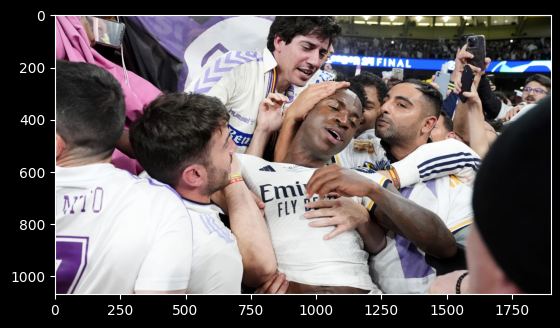

In [59]:
plt.imshow(image)
plt.show()

In [60]:
x = np.array(image)
print("converted")
print(x.shape)
face_objs = DeepFace.extract_faces( #extracting faces from the input image
    img_path = x, 
    detector_backend = "yolov8", #yolov8
    
)

print("this",face_objs)
#returns a list of dictionaries, each one with face pixels, confidence, width. height...etc 


converted
(1069, 1900, 3)
this [{'face': array([[[     0.1451,     0.16078,     0.16471],
        [     0.1451,     0.16078,     0.16471],
        [    0.12157,     0.13725,      0.1451],
        ...,
        [    0.12941,     0.13333,     0.14902],
        [    0.10196,     0.10588,     0.12157],
        [    0.10196,     0.10588,     0.12157]],

       [[    0.14902,     0.16471,     0.17255],
        [    0.17647,     0.19216,         0.2],
        [    0.16863,     0.18431,     0.18824],
        ...,
        [    0.10588,      0.1098,     0.12549],
        [   0.086275,    0.090196,      0.1098],
        [   0.078431,    0.082353,    0.098039]],

       [[    0.18039,     0.19608,     0.20392],
        [    0.15686,     0.17255,     0.18039],
        [    0.12157,     0.13725,      0.1451],
        ...,
        [   0.098039,     0.10196,     0.11765],
        [   0.086275,    0.090196,      0.1098],
        [   0.094118,    0.094118,     0.11373]],

       ...,

       [[    0.3058

In [61]:
import random

In [62]:
random.randint(0,255)

55

In [63]:
len(face_objs)

5

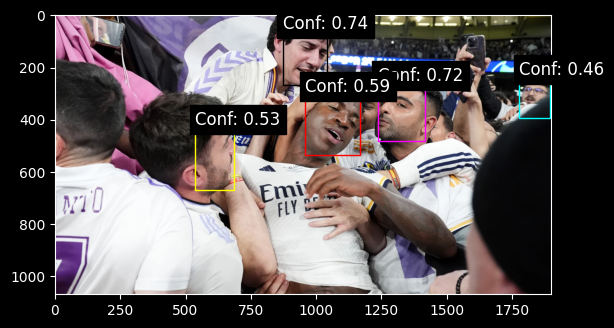

In [64]:
# Plotting detected faces on the original image
fig, ax = plt.subplots()

face_colors = [(random.randint(0,1),random.randint(0,1),random.randint(0,1))
                for face in range(len(face_objs))]

ax.imshow(image)
for idx, face_obj in enumerate(face_objs):
    facial_area = face_obj['facial_area']
    confidence = face_obj['confidence']
    rect = plt.Rectangle((facial_area['x'], facial_area['y']), facial_area['w'], facial_area['h'], fill=False,
                         color=face_colors[idx])
    ax.add_patch(rect)
    ax.text(facial_area['x'], facial_area['y'] - 10, f"Conf: {confidence:.2f}", color='white', fontsize=12, backgroundcolor='black')

plt.show()
    

In [65]:
detected_faces = [face_objs[idx]["face"] for idx in range(0, len(face_objs)) \
    if face_objs[idx]["confidence"] >= 0.5
    ]

#will be an empty list if there's no face detected

#for each detected face, run verify() to know whether it is in the database



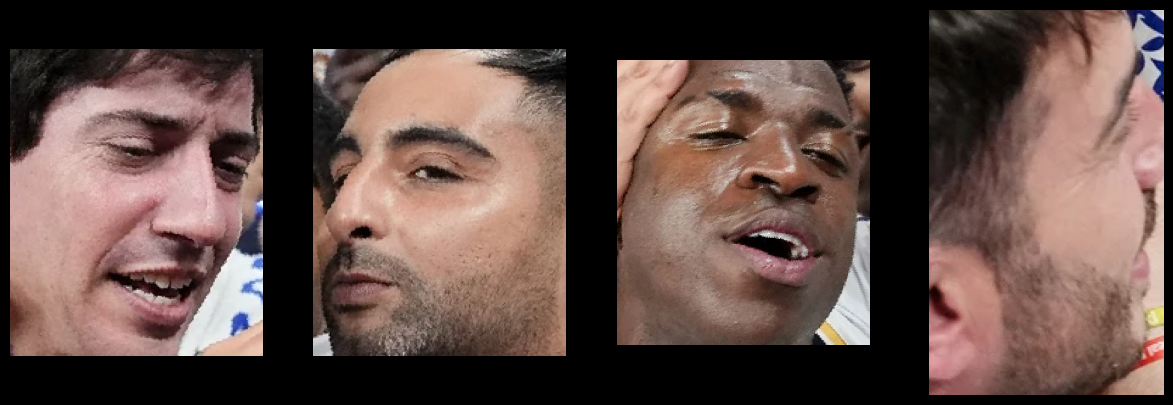

In [66]:
# Number of faces detected
num_faces = len(detected_faces)

# Create a grid plot
fig, axes = plt.subplots(nrows=1, ncols=num_faces, figsize=(15, 5))

# Check if there is only one axis or multiple
if num_faces == 1:
    axes = [axes]

# Plot each face in its subplot in RGB format
for ax, face in zip(axes, detected_faces):
    ax.imshow(face[:, :, ::-1])  # Convert BGR to RGB
    ax.axis('off')  # Hide the axes ticks

plt.show()


In [67]:

recognition_results = [
    DeepFace.find(
    img_path = detected_faces[idx],
    db_path = "../../criminal_data", 
    enforce_detection=False, #si no hay cara, no se verifica,
    # distance_metric="euclidean_l2",
    distance_metric="cosine", #both are good with VGG-Face

    align=False, #slightly better performance
    model_name="VGG-Face"
    # model_name=

    ) if len(detected_faces) > 0 else []
    #obtenemos el primer elemento de la lista que devuelve find()
    #ya que lo hace para cada cara, y nosotros solo entregamos de 1 en 1

    for idx in range(0, len(detected_faces))
    ]

24-06-22 18:21:02 - Searching [[[     0.1451     0.16078     0.16471]
  [     0.1451     0.16078     0.16471]
  [    0.12157     0.13725      0.1451]
  ...
  [    0.12941     0.13333     0.14902]
  [    0.10196     0.10588     0.12157]
  [    0.10196     0.10588     0.12157]]

 [[    0.14902     0.16471     0.17255]
  [    0.17647     0.19216         0.2]
  [    0.16863     0.18431     0.18824]
  ...
  [    0.10588      0.1098     0.12549]
  [   0.086275    0.090196      0.1098]
  [   0.078431    0.082353    0.098039]]

 [[    0.18039     0.19608     0.20392]
  [    0.15686     0.17255     0.18039]
  [    0.12157     0.13725      0.1451]
  ...
  [   0.098039     0.10196     0.11765]
  [   0.086275    0.090196      0.1098]
  [   0.094118    0.094118     0.11373]]

 ...

 [[    0.30588     0.27059     0.40392]
  [    0.32549     0.32157     0.46667]
  [    0.39216     0.41569     0.56471]
  ...
  [    0.69412     0.77647     0.92549]
  [    0.69412     0.77647     0.92549]
  [    0.69412

In [68]:
import pandas as pd

In [69]:
#the less distance, the more likely they are to be the same face

empty_table = pd.DataFrame(columns=["identity",  "hash", \
                        "target_x", "target_y", "target_w", "target_h",\
                            "source_x", "source_y", "source_w", "source_h", \
                                "threshold", "distance"])

print(recognition_results)

recognition_results = [pd.DataFrame(result[0].query("distance == distance.min() & distance < threshold")) \
if len(result[0])>=0 else empty_table
            
            for result in recognition_results 
            ]
#we'll get a dataframe for each detected criminal
#each dataframe has a property for the path to the criminal they think the input belongs
#along with the euclidean L2 similarity and it's threshold (if value < threshold, = face)


#we'll try first just getting the minimum distance without validating threshold nor
#converting it to an interpretable confidence value



[[Empty DataFrame
Columns: [identity, hash, target_x, target_y, target_w, target_h, source_x, source_y, source_w, source_h, threshold, distance]
Index: []], [Empty DataFrame
Columns: [identity, hash, target_x, target_y, target_w, target_h, source_x, source_y, source_w, source_h, threshold, distance]
Index: []], [                                identity  \
0  ../../criminal_data\Vinicius\pic1.jpg   
1   ../../criminal_data\Mbappe\pic1.jpeg   

                                       hash  target_x  target_y  target_w  \
0  3b3cf93e6087eb632423c8f47f084fec4c43cdee       749       275       504   
1  24ecabd15978bddda3bd2832dd175247cfdc7d50       612       306       497   

   target_h  source_x  source_y  source_w  source_h  threshold  distance  
0       504         0         0       208       234       0.68  0.629190  
1       497         0         0       208       234       0.68  0.667804  ], [Empty DataFrame
Columns: [identity, hash, target_x, target_y, target_w, target_h, source_x, s

In [70]:
1.12 distance respexto a 1.17

SyntaxError: invalid syntax (3687111721.py, line 1)

In [71]:
recognition_results

[Empty DataFrame
 Columns: [identity, hash, target_x, target_y, target_w, target_h, source_x, source_y, source_w, source_h, threshold, distance]
 Index: [],
 Empty DataFrame
 Columns: [identity, hash, target_x, target_y, target_w, target_h, source_x, source_y, source_w, source_h, threshold, distance]
 Index: [],
                                 identity  \
 0  ../../criminal_data\Vinicius\pic1.jpg   
 
                                        hash  target_x  target_y  target_w  \
 0  3b3cf93e6087eb632423c8f47f084fec4c43cdee       749       275       504   
 
    target_h  source_x  source_y  source_w  source_h  threshold  distance  
 0       504         0         0       208       234       0.68   0.62919  ,
 Empty DataFrame
 Columns: [identity, hash, target_x, target_y, target_w, target_h, source_x, source_y, source_w, source_h, threshold, distance]
 Index: []]

In [72]:
1 / (1 + 0.008)

0.9920634920634921

In [103]:
recognized_criminals = [result.identity[0].split("\\")[-2] if len(result)>0 else " "
                    for result in recognition_results
                    # if result.distance[0] < result.threshold[0]
                    ]

recognized_similarities = [result.distance[0] if len(result)>0 else " "
                    for result in recognition_results
                    ]

In [78]:
recognized_criminals

[' ', ' ', 'Vinicius', ' ']

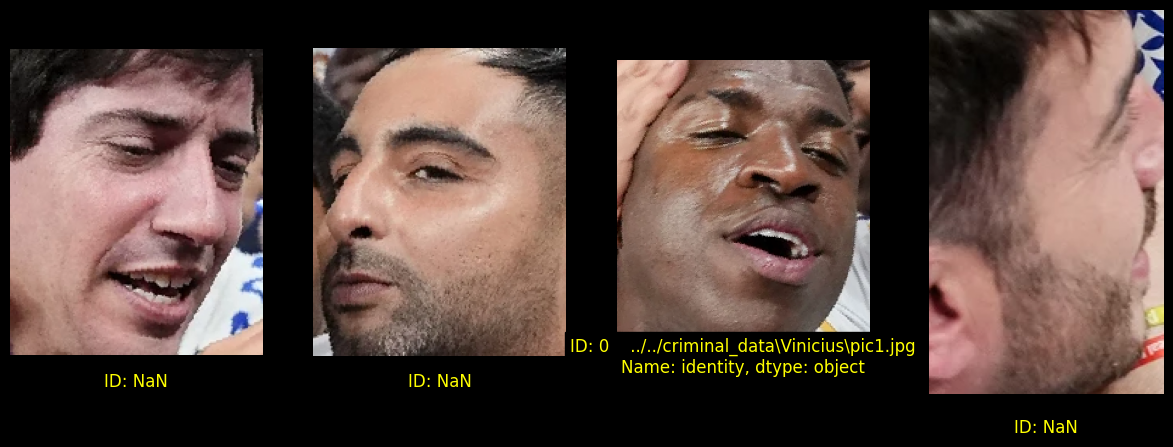

In [79]:
# Number of faces detected
num_faces = len(detected_faces)

# Create a grid plot
fig, axes = plt.subplots(nrows=1, ncols=num_faces, figsize=(15, 5))

# Check if there is only one axis or multiple
if num_faces == 1:
    axes = [axes]

# Plot each face in its subplot in RGB format and display recognition results
for ax, face, result in zip(axes, detected_faces, recognition_results):
    ax.imshow(face[:, :, ::-1])  # Convert BGR to RGB
    ax.axis('off')  # Hide the axes ticks
    # Display the recognition result as a text tag
    if len(result)==0:
        identity = 'NaN'
    else:
        identity = result.identity
    ax.text(0.5, -0.1, f'ID: {identity}', transform=ax.transAxes, ha='center', color='yellow', fontsize=12, backgroundcolor='black')

plt.show();

In [80]:
recognized_criminals

[' ', ' ', 'Vinicius', ' ']

In [81]:
recognized_similarities

[' ', ' ', 0.6291895053190087, ' ']

In [84]:
(-0.5 + 1) / 2

0.25

In [82]:
a = (0.6291895053190087 + 1) / 2

In [97]:
a

0.8145947526595043

In [106]:
recognized_probabilities = [((val+1)/2) if val!=" " else " " for val in recognized_similarities]

In [107]:
recognized_probabilities

[' ', ' ', 0.8145947526595043, ' ']

In [102]:
recognized_similarities

[0.9072973763297522]

In [ ]:
recognized_similarities

[<function __main__.<lambda>(val)>,
 <function __main__.<lambda>(val)>,
 <function __main__.<lambda>(val)>,
 <function __main__.<lambda>(val)>]